In [1]:
!python -m pip install -e ..

Obtaining file:///Users/asmazzeo/Documents/UTN/Proyecto%20FInal/Frontier-Exploration-with-a-prior
  Preparing metadata (setup.py) ... done
  Attempting uninstall: FrontierExploration
    Found existing installation: FrontierExploration 1.0.0
    Uninstalling FrontierExploration-1.0.0:
      Successfully uninstalled FrontierExploration-1.0.0
  Running setup.py develop for FrontierExploration

[notice] A new release of pip available: 22.1.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import os
import pickle
from matplotlib import pyplot as plt

base_dir = os.getcwd()
# file_dir = f"{base_dir}/files/planta_murguiondo_grid.pkl"
file_dir = f"{base_dir}/files/small_house_grid.pkl"


with open(file_dir, "rb") as file:
    grid = pickle.load(file)

In [3]:
# grid.plot(figsize=(100,100))

1238it [00:30, 41.26it/s]                                                                                                            


The robot should take 929 steps to explore the grid.


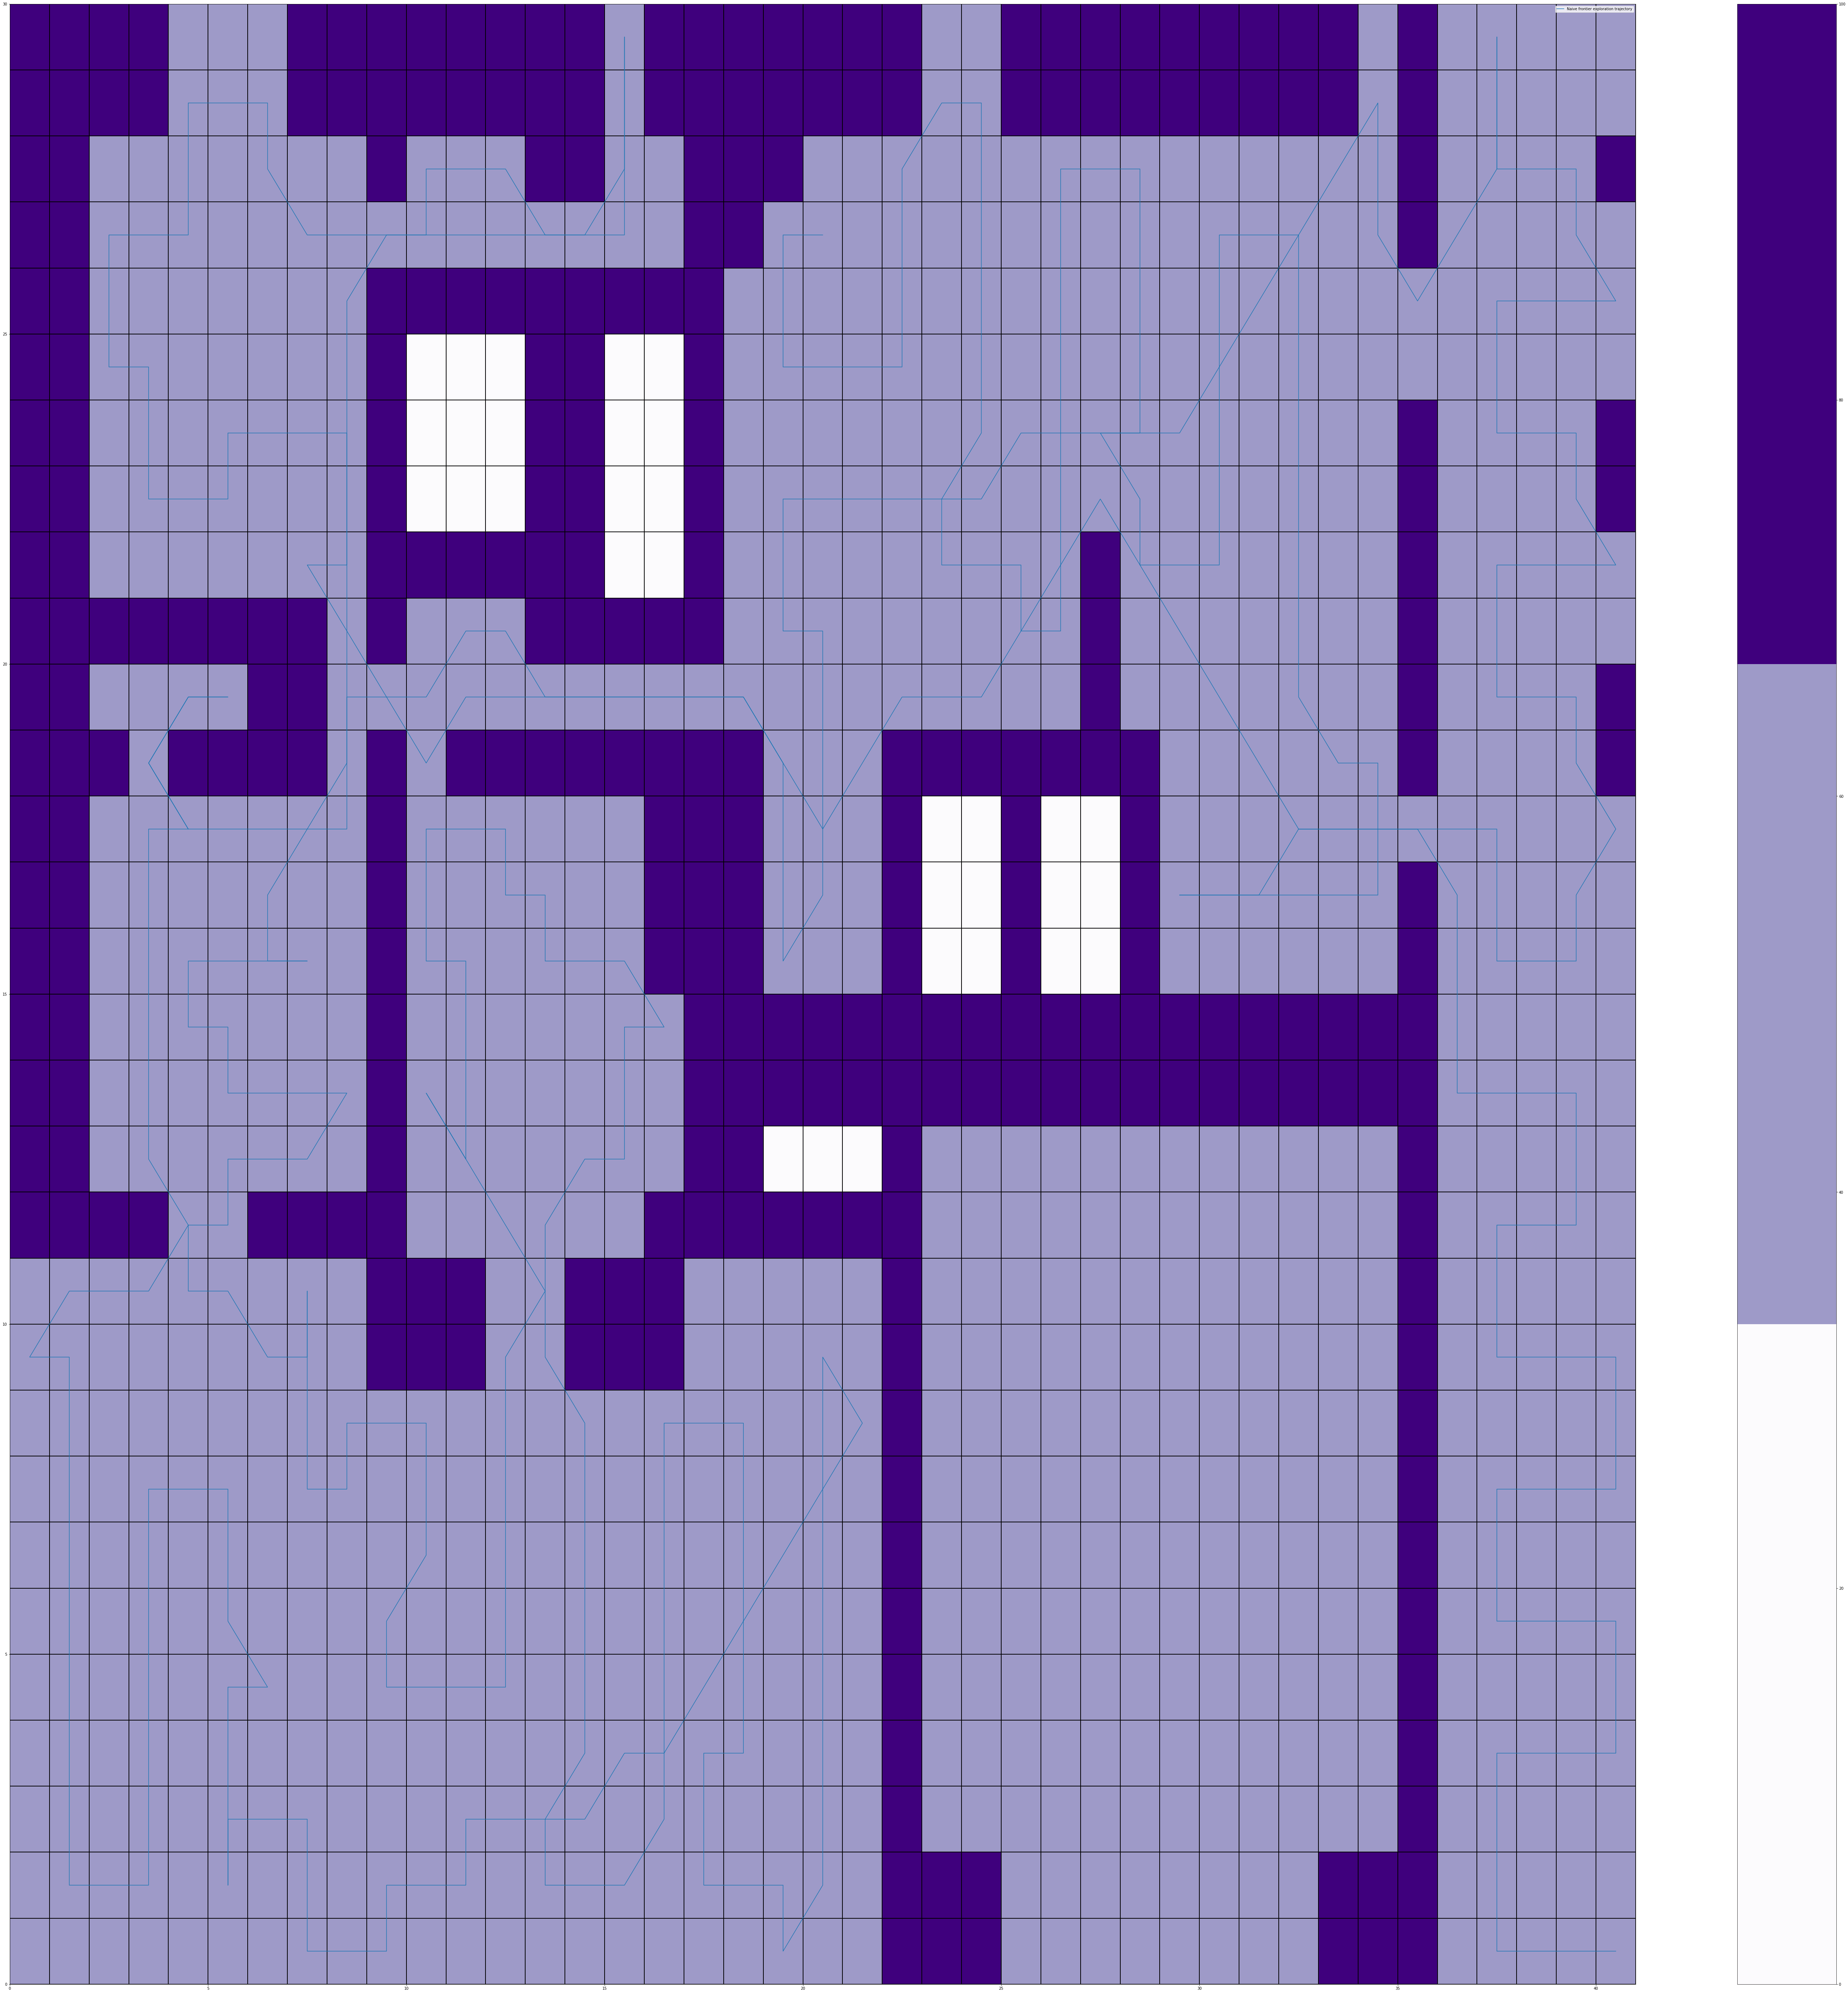

In [6]:
import numpy as np
import random
from FrontierExploration.preprocessing.trajectory.naive_approach import NaiveFrontierExploration

empty_cells = grid.get_empty_cells()
start_cell_idx = random.randint(0, len(empty_cells))
start_cell = tuple(empty_cells[start_cell_idx])
p = NaiveFrontierExploration(grid=grid, start_cell=start_cell)
path = p.solve()

fig = p.plot(figsize=(100,100))
ax = fig.gca()
to_plot = np.asarray(path).T
to_plot = np.add(to_plot, np.ones_like(to_plot) * 0.5)
ax.plot(to_plot[0], to_plot[1],
        label="Naive frontier exploration trajectory")
plt.legend(loc='best')
print(f"The robot should take {len(path)} steps to explore the grid.")

plt.show()